In [1]:
##script OK
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from io import StringIO
import os
from os.path import basename, splitext
#from pathlib import Path
import seaborn as sns

In [ ]:
#path = 'tableursParVal/dateComposition/1100ca.tsv-Confusion.md'
#with open(path, 'r') as f:
#    texteT = f.read()
#    print(f)
#    t = splitext(basename(path))[0]
#    titre = t.partition(".tsv")[0]

In [ ]:
### TO DO
# gestion des points sur le graphique

In [2]:
#fonction de récupération des matrices des fichiers .md
def get_sections(s):
    for sec in s.split('## '):
        yield sec if sec.startswith('## ') else '## '+sec

In [3]:
#fonction de production des donnnées sous forme de tableau propre
def prod_DF(texteT,titre,subfile):
    dfGlobalDataLoc = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support','typology','label'])
    for i,sec in enumerate(get_sections(texteT)):
        if i == 0:
            pass
        else:
            print(i,sec)
            sec2 = re.sub('##.*', '', sec)
            currentVal = re.search('##\s*(\w*)\n', sec).group(1)
            df = pd.read_csv(StringIO(sec2.replace(' ', '')), sep='|',index_col=1).dropna(axis=1,how='all').iloc[1:]
            df.insert(4,"type",subfile, True)
            df.insert(5,"typology",titre,True)
            df.insert(6,"label",currentVal,True)
            dfGlobalDataLoc = dfGlobalDataLoc.append(df)
    print(dfGlobalDataLoc)        
    return dfGlobalDataLoc

In [4]:
#df : bien vider avant boucle
dfGlobalData = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support','type','typology','label'])

In [5]:
#boucle sur directory/subdirectory avec application de la fonction et production d'un tableau avec les data
basepath = 'tableursParVal/'
for subFile in os.listdir(basepath):
    if os.path.isdir(os.path.join(basepath, subFile)):
        dir_path = os.path.join(basepath, subFile)+'/'
        print(dir_path)
        for entry in os.listdir(dir_path):
            if entry.endswith('Confusion.md'):
                fullPath =dir_path+entry
                with open(fullPath, 'r') as f:
                    texteT = f.read()
                    print(f)
                    t = splitext(basename(fullPath))[0]
                    titre = t.partition(".tsv")[0]
                    dfGlobalDataLoc = prod_DF(texteT,titre,subFile)
                    dfGlobalData = dfGlobalData.append(dfGlobalDataLoc)

tableursParVal/deaf/
<_io.TextIOWrapper name='tableursParVal/deaf/PoèmeMorB_A.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9056   | 0.8057    | 0.802  | 519     |
| known-tokens     | 0.9056   | 0.8057    | 0.802  | 519     |
| ambiguous-tokens | 0.8735   | 0.7321    | 0.7221 | 166     |
| unknown-targets  | 0.2857   | 0.0909    | 0.0909 | 7       |


                 accuracy precision  recall support     typology  label  type
all                0.9056    0.8057   0.802     519  PoèmeMorB_A  lemma  deaf
known-tokens       0.9056    0.8057   0.802     519  PoèmeMorB_A  lemma  deaf
ambiguous-tokens   0.8735    0.7321  0.7221     166  PoèmeMorB_A  lemma  deaf
unknown-targets    0.2857    0.0909  0.0909       7  PoèmeMorB_A  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/FloovA.tsv-PosConfusion.md' mode='r' encoding

ambiguous-tokens   0.8793    0.7786  0.7495     116  GuillDoleS   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/RouH_3b.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.86     | 0.7077    | 0.6974 | 100     |
| known-tokens     | 0.86     | 0.7077    | 0.6974 | 100     |
| ambiguous-tokens | 0.913    | 0.6923    | 0.6923 | 23      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 7       |


                 accuracy precision  recall support typology  label  type
all                  0.86    0.7077  0.6974     100  RouH_3b  lemma  deaf
known-tokens         0.86    0.7077  0.6974     100  RouH_3b  lemma  deaf
ambiguous-tokens    0.913    0.6923  0.6923      23  RouH_3b  lemma  deaf
unknown-targets       0.0       0.0     0.0       7  RouH_3b  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/SBernAn2S.tsv-

                 accuracy precision  recall support    typology  label  type
all                0.8957     0.818  0.8167     115  MarieMil_H  lemma  deaf
known-tokens       0.8957     0.818  0.8167     115  MarieMil_H  lemma  deaf
ambiguous-tokens      0.9    0.7143  0.7143      30  MarieMil_H  lemma  deaf
unknown-targets       0.0       0.0     0.0       3  MarieMil_H  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/BesantR.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9278   | 0.8696    | 0.8696 | 97      |
| known-tokens     | 0.9278   | 0.8696    | 0.8696 | 97      |
| ambiguous-tokens | 1.0      | 1.0       | 1.0    | 28      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 1       |


                 accuracy precision  recall support typology  label  type
all                0.9278    0.8696  0.8696   

                 accuracy precision  recall support       typology label  type
all                0.8197    0.7092  0.7256     122  ChastVergiS_B   POS  deaf
known-tokens       0.8197    0.7092  0.7256     122  ChastVergiS_B   POS  deaf
ambiguous-tokens   0.8367    0.7111  0.7429      49  ChastVergiS_B   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/RobOmMirL.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8721   | 0.7513    | 0.7439 | 219     |
| known-tokens     | 0.8721   | 0.7513    | 0.7439 | 219     |
| ambiguous-tokens | 0.8636   | 0.7316    | 0.7412 | 66      |
| unknown-targets  | 0.25     | 0.1429    | 0.1429 | 4       |


                 accuracy precision  recall support   typology  label  type
all                0.8721    0.7513  0.7439     219  RobOmMirL  lemma  deaf
known-tokens       0.8721    0.7513

                 accuracy precision  recall support            typology label  \
all                0.8411     0.805   0.716     107  NoomenFabl_transB*   POS   
known-tokens       0.8411     0.805   0.716     107  NoomenFabl_transB*   POS   
ambiguous-tokens   0.9412    0.8438  0.8311      51  NoomenFabl_transB*   POS   

                  type  
all               deaf  
known-tokens      deaf  
ambiguous-tokens  deaf  
<_io.TextIOWrapper name='tableursParVal/deaf/PercLo_P.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9095   | 0.7872    | 0.7838 | 232     |
| known-tokens     | 0.9095   | 0.7872    | 0.7838 | 232     |
| ambiguous-tokens | 0.9474   | 0.837     | 0.8271 | 114     |


                 accuracy precision  recall support  typology label  type
all                0.9095    0.7872  0.7838     232  PercLo_P   POS  dea

                 accuracy precision  recall support typology  label  type
all                0.8559    0.7101  0.7156     340  YsLyonF  lemma  deaf
known-tokens       0.8559    0.7101  0.7156     340  YsLyonF  lemma  deaf
ambiguous-tokens   0.8544    0.6518  0.6577     103  YsLyonF  lemma  deaf
unknown-targets       0.0       0.0     0.0       9  YsLyonF  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/ElesB_G.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7685   | 0.7142    | 0.734  | 108     |
| known-tokens     | 0.7685   | 0.7142    | 0.734  | 108     |
| ambiguous-tokens | 0.7812   | 0.7761    | 0.7024 | 64      |


                 accuracy precision  recall support typology label  type
all                0.7685    0.7142   0.734     108  ElesB_G   POS  deaf
known-tokens       0.7685    0.7142   0.734     108  Ele

                 accuracy precision  recall support        typology label  \
all                0.9121    0.8848  0.8871      91  ContPerc_4_TW*   POS   
known-tokens       0.9121    0.8848  0.8871      91  ContPerc_4_TW*   POS   
ambiguous-tokens      1.0       1.0     1.0      38  ContPerc_4_TW*   POS   

                  type  
all               deaf  
known-tokens      deaf  
ambiguous-tokens  deaf  
<_io.TextIOWrapper name='tableursParVal/deaf/AdamA.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9138   | 0.8284    | 0.8334 | 325     |
| known-tokens     | 0.9138   | 0.8284    | 0.8334 | 325     |
| ambiguous-tokens | 0.9084   | 0.8346    | 0.8401 | 131     |


                 accuracy precision  recall support typology label  type
all                0.9138    0.8284  0.8334     325    AdamA   POS  deaf
known-tokens       

                 accuracy precision  recall support    typology label  type
all                0.9182    0.8432  0.8348     159  AlexisAloS   POS  deaf
known-tokens       0.9182    0.8432  0.8348     159  AlexisAloS   POS  deaf
ambiguous-tokens   0.9091    0.8545  0.8512      55  AlexisAloS   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/ThebesR_C.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8796   | 0.7648    | 0.7625 | 191     |
| known-tokens     | 0.8796   | 0.7648    | 0.7625 | 191     |
| ambiguous-tokens | 0.9434   | 0.8661    | 0.875  | 53      |
| unknown-targets  | 0.1      | 0.0588    | 0.0588 | 10      |


                 accuracy precision  recall support   typology  label  type
all                0.8796    0.7648  0.7625     191  ThebesR_C  lemma  deaf
known-tokens       0.8796    0.7648  0.7625    

                 accuracy precision  recall support   typology label  type
all                0.9323    0.8855  0.8748     133  GirVianeE   POS  deaf
known-tokens       0.9323    0.8855  0.8748     133  GirVianeE   POS  deaf
ambiguous-tokens   0.9667    0.9667  0.9792      60  GirVianeE   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Turp1M.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7595   | 0.5516    | 0.544  | 395     |
| known-tokens     | 0.7595   | 0.5516    | 0.544  | 395     |
| ambiguous-tokens | 0.7941   | 0.6295    | 0.6081 | 102     |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 17      |


                 accuracy precision  recall support typology  label  type
all                0.7595    0.5516   0.544     395   Turp1M  lemma  deaf
known-tokens       0.7595    0.5516   0.544     395   Turp

                 accuracy precision  recall support      typology label  type
all                0.9027    0.7791  0.7815     874  MirNDChartrK   POS  deaf
known-tokens       0.9027    0.7791  0.7815     874  MirNDChartrK   POS  deaf
ambiguous-tokens   0.9223    0.7959    0.81     412  MirNDChartrK   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/SGregA1S.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9077   | 0.7467    | 0.7441 | 195     |
| known-tokens     | 0.9077   | 0.7467    | 0.7441 | 195     |
| ambiguous-tokens | 0.908    | 0.8499    | 0.8293 | 87      |


                 accuracy precision  recall support  typology label  type
all                0.9077    0.7467  0.7441     195  SGregA1S   POS  deaf
known-tokens       0.9077    0.7467  0.7441     195  SGregA1S   POS  deaf
ambiguous-tokens    0.908    0.8499  

<_io.TextIOWrapper name='tableursParVal/deaf/SermCarP.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8472   | 0.6307    | 0.6104 | 144     |
| known-tokens     | 0.8472   | 0.6307    | 0.6104 | 144     |
| ambiguous-tokens | 0.9      | 0.76      | 0.72   | 40      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 7       |


                 accuracy precision  recall support  typology  label  type
all                0.8472    0.6307  0.6104     144  SermCarP  lemma  deaf
known-tokens       0.8472    0.6307  0.6104     144  SermCarP  lemma  deaf
ambiguous-tokens      0.9      0.76    0.72      40  SermCarP  lemma  deaf
unknown-targets       0.0       0.0     0.0       7  SermCarP  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/CharroiSch_A4*.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|          

<_io.TextIOWrapper name='tableursParVal/deaf/CassidP.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.861    | 0.7632    | 0.7543 | 187     |
| known-tokens     | 0.861    | 0.7632    | 0.7543 | 187     |
| ambiguous-tokens | 0.9545   | 0.7956    | 0.8    | 66      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 12      |


                 accuracy precision  recall support typology  label  type
all                 0.861    0.7632  0.7543     187  CassidP  lemma  deaf
known-tokens        0.861    0.7632  0.7543     187  CassidP  lemma  deaf
ambiguous-tokens   0.9545    0.7956     0.8      66  CassidP  lemma  deaf
unknown-targets       0.0       0.0     0.0      12  CassidP  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/CalendreS.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | a

                 accuracy precision  recall support    typology  label  type
all                0.8718    0.6625  0.6595     733  BestGuillR  lemma  deaf
known-tokens       0.8718    0.6625  0.6595     733  BestGuillR  lemma  deaf
ambiguous-tokens   0.8841    0.6277  0.6202     233  BestGuillR  lemma  deaf
unknown-targets      0.08    0.0465  0.0465      25  BestGuillR  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/MarieFab_E.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9286   | 0.8594    | 0.8633 | 98      |
| known-tokens     | 0.9286   | 0.8594    | 0.8633 | 98      |
| ambiguous-tokens | 0.9032   | 0.775     | 0.775  | 31      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 2       |


                 accuracy precision  recall support    typology  label  type
all                0.9286    0.8594  0.8

                 accuracy precision  recall support  typology label  type
all                0.8818    0.7529  0.7576     939  RoseLLec   POS  deaf
known-tokens       0.8818    0.7529  0.7576     939  RoseLLec   POS  deaf
ambiguous-tokens   0.9205    0.7688  0.7839     453  RoseLLec   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/ElesB_G.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8519   | 0.7487    | 0.746  | 108     |
| known-tokens     | 0.8519   | 0.7487    | 0.746  | 108     |
| ambiguous-tokens | 0.75     | 0.6042    | 0.5982 | 44      |


                 accuracy precision  recall support typology  label  type
all                0.8519    0.7487   0.746     108  ElesB_G  lemma  deaf
known-tokens       0.8519    0.7487   0.746     108  ElesB_G  lemma  deaf
ambiguous-tokens     0.75    0.6042  0.5982      4

<_io.TextIOWrapper name='tableursParVal/deaf/EvEnfB.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9535   | 0.8912    | 0.8852 | 86      |
| known-tokens     | 0.9535   | 0.8912    | 0.8852 | 86      |
| ambiguous-tokens | 0.9655   | 0.9762    | 0.9762 | 29      |


                 accuracy precision  recall support typology label  type
all                0.9535    0.8912  0.8852      86   EvEnfB   POS  deaf
known-tokens       0.9535    0.8912  0.8852      86   EvEnfB   POS  deaf
ambiguous-tokens   0.9655    0.9762  0.9762      29   EvEnfB   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/RenN_A.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9469   | 0.9299    | 0

                 accuracy precision  recall support    typology label  type
all                0.9388    0.8667  0.8547      98  ContPerc2R   POS  deaf
known-tokens       0.9388    0.8667  0.8547      98  ContPerc2R   POS  deaf
ambiguous-tokens      1.0       1.0     1.0      47  ContPerc2R   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/BestPierre1M.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.922    | 0.8242    | 0.8468 | 1180    |
| known-tokens     | 0.922    | 0.8242    | 0.8468 | 1180    |
| ambiguous-tokens | 0.9358   | 0.7983    | 0.8013 | 530     |


                 accuracy precision  recall support      typology label  type
all                 0.922    0.8242  0.8468    1180  BestPierre1M   POS  deaf
known-tokens        0.922    0.8242  0.8468    1180  BestPierre1M   POS  deaf
ambiguous-tokens   0.9358    

                 accuracy precision  recall support typology  label  type
all                0.9091    0.8079  0.8026     297   SAntV*  lemma  deaf
known-tokens       0.9091    0.8079  0.8026     297   SAntV*  lemma  deaf
ambiguous-tokens   0.9732    0.9423  0.9408     112   SAntV*  lemma  deaf
unknown-targets       0.5    0.3333  0.3333       4   SAntV*  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/SHilV*.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8778   | 0.7294    | 0.7331 | 499     |
| known-tokens     | 0.8778   | 0.7294    | 0.7331 | 499     |
| ambiguous-tokens | 0.9357   | 0.7631    | 0.7808 | 171     |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 16      |


                 accuracy precision  recall support typology  label  type
all                0.8778    0.7294  0.7331     499   SHilV*  

<_io.TextIOWrapper name='tableursParVal/deaf/YsLyonF.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8971   | 0.768     | 0.776  | 340     |
| known-tokens     | 0.8971   | 0.768     | 0.776  | 340     |
| ambiguous-tokens | 0.938    | 0.8969    | 0.8973 | 129     |


                 accuracy precision  recall support typology label  type
all                0.8971     0.768   0.776     340  YsLyonF   POS  deaf
known-tokens       0.8971     0.768   0.776     340  YsLyonF   POS  deaf
ambiguous-tokens    0.938    0.8969  0.8973     129  YsLyonF   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/MarieLanvR2_P.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.913    | 0

                 accuracy precision  recall support    typology  label  type
all                0.8919     0.831  0.8268     111  ChevIIEspF  lemma  deaf
known-tokens       0.8919     0.831  0.8268     111  ChevIIEspF  lemma  deaf
ambiguous-tokens   0.8293    0.7241  0.7276      41  ChevIIEspF  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/RenNouvR.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.901    | 0.8588    | 0.8304 | 101     |
| known-tokens     | 0.901    | 0.8588    | 0.8304 | 101     |
| ambiguous-tokens | 0.8837   | 0.8512    | 0.8524 | 43      |


                 accuracy precision  recall support  typology label  type
all                 0.901    0.8588  0.8304     101  RenNouvR   POS  deaf
known-tokens        0.901    0.8588  0.8304     101  RenNouvR   POS  deaf
ambiguous-tokens   0.8837    0.8512  0.85

                 accuracy precision  recall support  typology  label  type
all                 0.802    0.6105  0.5977     101  Turpin1A  lemma  deaf
known-tokens        0.802    0.6105  0.5977     101  Turpin1A  lemma  deaf
ambiguous-tokens   0.8125       0.6   0.545      32  Turpin1A  lemma  deaf
unknown-targets       0.0       0.0     0.0       2  Turpin1A  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/BodelNicH2.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8931   | 0.75      | 0.7425 | 131     |
| known-tokens     | 0.8931   | 0.75      | 0.7425 | 131     |
| ambiguous-tokens | 0.9706   | 0.913     | 0.913  | 34      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 5       |


                 accuracy precision  recall support    typology  label  type
all                0.8931      0.75  0.7425     13

                 accuracy precision  recall support typology label  \
all                0.9048    0.7618  0.7419    7843  1emxive   POS   
known-tokens       0.9048    0.7618  0.7419    7843  1emxive   POS   
ambiguous-tokens   0.9372    0.7949  0.7986    3681  1emxive   POS   

                               type  
all               dateManuscritType  
known-tokens      dateManuscritType  
ambiguous-tokens  dateManuscritType  
<_io.TextIOWrapper name='tableursParVal/dateManuscritType/2emxive.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8847   | 0.7242    | 0.7123 | 451     |
| known-tokens     | 0.8847   | 0.7242    | 0.7123 | 451     |
| ambiguous-tokens | 0.9549   | 0.8       | 0.7654 | 133     |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 19      |


                 accuracy precision  recall support typolog

                 accuracy precision  recall support typology label  type
all                0.9181    0.7886  0.7338    8803      non   POS  vers
known-tokens       0.9181    0.7886  0.7338    8803      non   POS  vers
ambiguous-tokens   0.9368    0.7601    0.72    4097      non   POS  vers
<_io.TextIOWrapper name='tableursParVal/vers/non.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8796   | 0.5829    | 0.5861 | 8803    |
| known-tokens     | 0.8796   | 0.5829    | 0.5861 | 8803    |
| ambiguous-tokens | 0.917    | 0.6016    | 0.6371 | 2928    |
| unknown-targets  | 0.0393   | 0.0289    | 0.0271 | 280     |


                 accuracy precision  recall support typology  label  type
all                0.8796    0.5829  0.5861    8803      non  lemma  vers
known-tokens       0.8796    0.5829  0.5861    8803      non  lemma  

<_io.TextIOWrapper name='tableursParVal/genreType/nil.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8798   | 0.7047    | 0.7066 | 1772    |
| known-tokens     | 0.8798   | 0.7047    | 0.7066 | 1772    |
| ambiguous-tokens | 0.868    | 0.6847    | 0.6858 | 591     |
| unknown-targets  | 0.075    | 0.0282    | 0.0282 | 40      |


                 accuracy precision  recall support typology  label       type
all                0.8798    0.7047  0.7066    1772      nil  lemma  genreType
known-tokens       0.8798    0.7047  0.7066    1772      nil  lemma  genreType
ambiguous-tokens    0.868    0.6847  0.6858     591      nil  lemma  genreType
unknown-targets     0.075    0.0282  0.0282      40      nil  lemma  genreType
<_io.TextIOWrapper name='tableursParVal/genreType/didact.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ##

                 accuracy precision  recall support typology label  \
all                0.9008    0.7523  0.7461     746   sudest   POS   
known-tokens       0.9008    0.7523  0.7461     746   sudest   POS   
ambiguous-tokens   0.9451    0.7966  0.7897     328   sudest   POS   

                                 type  
all               lieuCompositionType  
known-tokens      lieuCompositionType  
ambiguous-tokens  lieuCompositionType  
<_io.TextIOWrapper name='tableursParVal/lieuCompositionType/lorr.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.835    | 0.6273    | 0.6252 | 618     |
| known-tokens     | 0.835    | 0.6273    | 0.6252 | 618     |
| ambiguous-tokens | 0.8389   | 0.5707    | 0.5711 | 180     |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 29      |


                 accuracy precision  recall support 

<_io.TextIOWrapper name='tableursParVal/lieuCompositionType/nil.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9097   | 0.7963    | 0.7631 | 4497    |
| known-tokens     | 0.9097   | 0.7963    | 0.7631 | 4497    |
| ambiguous-tokens | 0.9451   | 0.8827    | 0.8634 | 2075    |


                 accuracy precision  recall support typology label  \
all                0.9097    0.7963  0.7631    4497      nil   POS   
known-tokens       0.9097    0.7963  0.7631    4497      nil   POS   
ambiguous-tokens   0.9451    0.8827  0.8634    2075      nil   POS   

                                 type  
all               lieuCompositionType  
known-tokens      lieuCompositionType  
ambiguous-tokens  lieuCompositionType  
<_io.TextIOWrapper name='tableursParVal/lieuCompositionType/centre.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## 

<_io.TextIOWrapper name='tableursParVal/dateCompositionType/1emxive.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8854   | 0.7209    | 0.7208 | 314     |
| known-tokens     | 0.8854   | 0.7209    | 0.7208 | 314     |
| ambiguous-tokens | 0.916    | 0.7814    | 0.8057 | 131     |


                 accuracy precision  recall support typology label  \
all                0.8854    0.7209  0.7208     314  1emxive   POS   
known-tokens       0.8854    0.7209  0.7208     314  1emxive   POS   
ambiguous-tokens    0.916    0.7814  0.8057     131  1emxive   POS   

                                 type  
all               dateCompositionType  
known-tokens      dateCompositionType  
ambiguous-tokens  dateCompositionType  
<_io.TextIOWrapper name='tableursParVal/dateCompositionType/2emxive.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'

<_io.TextIOWrapper name='tableursParVal/lieuManuscritType/pic.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8926   | 0.6324    | 0.6332 | 8277    |
| known-tokens     | 0.8926   | 0.6324    | 0.6332 | 8277    |
| ambiguous-tokens | 0.9081   | 0.6041    | 0.6198 | 2776    |
| unknown-targets  | 0.05     | 0.0226    | 0.0203 | 200     |


                 accuracy precision  recall support typology  label  \
all                0.8926    0.6324  0.6332    8277      pic  lemma   
known-tokens       0.8926    0.6324  0.6332    8277      pic  lemma   
ambiguous-tokens   0.9081    0.6041  0.6198    2776      pic  lemma   
unknown-targets      0.05    0.0226  0.0203     200      pic  lemma   

                               type  
all               lieuManuscritType  
known-tokens      lieuManuscritType  
ambiguous-tokens  lieuManu

<_io.TextIOWrapper name='tableursParVal/lieuManuscritType/champ.tsv-PosConfusion.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9054   | 0.7846    | 0.7677 | 2335    |
| known-tokens     | 0.9054   | 0.7846    | 0.7677 | 2335    |
| ambiguous-tokens | 0.9355   | 0.791     | 0.7909 | 1086    |


                 accuracy precision  recall support typology label  \
all                0.9054    0.7846  0.7677    2335    champ   POS   
known-tokens       0.9054    0.7846  0.7677    2335    champ   POS   
ambiguous-tokens   0.9355     0.791  0.7909    1086    champ   POS   

                               type  
all               lieuManuscritType  
known-tokens      lieuManuscritType  
ambiguous-tokens  lieuManuscritType  
<_io.TextIOWrapper name='tableursParVal/lieuManuscritType/bourgfrc.tsv-LemmaConfusion.md' mode='r' encoding='UTF-8'>
1 ## lemma


In [6]:
#vérification tableau
dfGlobalData

,accuracy,precision,recall,support,type,typology,label
all,0.9056,0.8057,0.802,519,deaf,PoèmeMorB_A,lemma
known-tokens,0.9056,0.8057,0.802,519,deaf,PoèmeMorB_A,lemma
ambiguous-tokens,0.8735,0.7321,0.7221,166,deaf,PoèmeMorB_A,lemma
unknown-targets,0.2857,0.0909,0.0909,7,deaf,PoèmeMorB_A,lemma
all,0.8723,0.7458,0.7165,329,deaf,FloovA,POS
...,...,...,...,...,...,...,...
known-tokens,0.8954,0.7357,0.7316,1271,lieuManuscritType,wall,POS
ambiguous-tokens,0.9232,0.7704,0.7815,534,lieuManuscritType,wall,POS
all,0.9029,0.7752,0.7456,7315,lieuManuscritType,bourgfrc,POS
known-tokens,0.9029,0.7752,0.7456,7315,lieuManuscritType,bourgfrc,POS


In [397]:
#on enregistre
dfGlobalData.to_csv('donneesGenerales.tsv',header=True,sep='\t', index_label='type_token', mode='w', encoding='UTF-8')

In [72]:
## on peut sélectionner selon le type
dfG = dfGlobalData[dfGlobalData["type"]== "genreType"]

In [205]:
#graphique basique
#fig = px.line(df, x="typology", y="accuracy", title='Précision par date')
#fig.show()

In [73]:
#sélection des colonnes pour la modélisation
dfColInt = dfG[['accuracy','typology','label']]
#on sélectionne que la valeur all
df = dfColInt.loc['all']
df

,accuracy,typology,label
all,0.8611,sermon,lemma
all,0.901,roman,POS
all,0.9033,hist,POS
all,0.8889,narrbref,lemma
all,0.8981,theatre,POS
all,0.8782,poalleg,POS
all,0.9145,roman,lemma
all,0.8825,theatre,lemma
all,0.8872,narrbref,POS
all,0.8798,nil,lemma


In [74]:
#reshape as matrix
df = pd.pivot_table(df, values ='accuracy', index =['typology'],columns =['label'], aggfunc='first')
df

label,POS,lemma
typology,,
bible,0.8986,0.8418
chgeste,0.8779,0.8709
didact,0.9066,0.8767
epist,0.9128,0.8974
hagio,0.9107,0.8799
hist,0.9033,0.8568
narrbref,0.8872,0.8889
nil,0.8804,0.8798
poalleg,0.8782,0.8727


In [75]:
#+ as float
dfPlot = df[df.columns].astype(float) 

In [202]:
#y = dfPlot[['lemma']]
#z = dfPlot[['POS']]
#plt.figure(figsize=(20,20))
#ax = y.plot()
#z.plot(ax=ax)

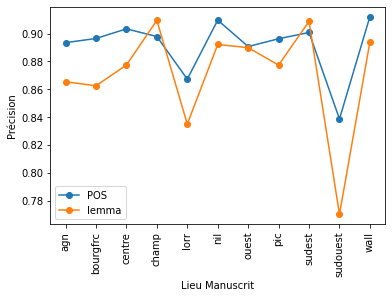

In [435]:
#ploter lemma et POS pour une même donnée (lieux et textes)
plt.plot(dfPlot,marker='o')
plt.gca().legend(('POS','lemma'))
plt.xlabel('Lieu ')
plt.ylabel('Précision')
plt.xticks(rotation=90)
plt.savefig('visualisations/courbes/lemmaPosLieuMSAcc.png', dpi=300, transparent=False,bbox_inches='tight') 

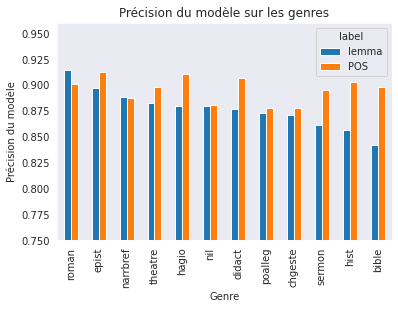

In [76]:
##ajout diagramme

sns.set_style("dark")
#dfPlot.plot(kind="bar")
dfPlot.sort_values('lemma', ascending=False)[['lemma','POS']].plot(kind="bar")
#permet de définir à partir d'où les données vont apparaître
plt.ylim(0.75)
plt.title("Précision du modèle sur les genres")
plt.xlabel("Genre")
plt.ylabel("Précision du modèle")
plt.savefig('visualisationsv2/diag/lemmaPosGenre.png', dpi=300, transparent=False,bbox_inches='tight') 

In [70]:
#pour dates avant plot courbes
dfPlot.index = pd.CategoricalIndex(dfPlot.index, categories= ["nil", "1emxiie", "mxiie", "2emxiie", "1emxiiie", "mxiiie","2emxiiie","1emxive","mxive","2emxive","xve","1emxve","2emxve","mxviiie"])
dfPlot.sort_index(level=0, inplace=True)
dfPlotOrder = dfPlot[::-1] 
dfPlotOrder
dfPlot

label,POS,lemma
typology,,
nil,0.9104,0.9104
1emxiie,0.8586,0.8966
mxiie,0.9349,0.8465
2emxiie,0.9002,0.8293
1emxiiie,0.8878,0.8914
mxiiie,0.8938,0.8777
2emxiiie,0.8957,0.8785
1emxive,0.9048,0.9012
mxive,0.9130,0.8919


/home/lucence/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:405: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



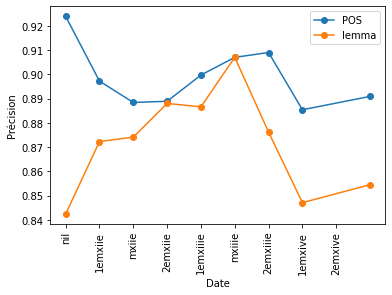

In [447]:
#ploter pour date
plt.plot(dfPlot,marker="o")
plt.gca().legend(('POS','lemma'))
plt.xlabel('Date')
plt.ylabel('Précision')
plt.xticks(rotation=90)
#ax.set_xticklabels(xticklabels, rotation = 45, ha="right")
plt.savefig('visualisations/courbes/lemmaPosDateCompoAcc.png', dpi=300) 


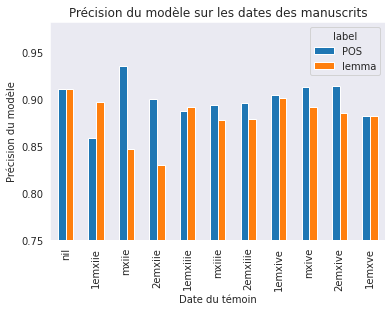

In [71]:
##ajout diagramme

sns.set_style("dark")
dfPlot.plot(kind="bar")
#dfPlot.sort_values('lemma', ascending=False)[['lemma','POS']].plot(kind="bar")
#permet de définir à partir d'où les données vont apparaître
plt.ylim(0.75)
plt.title("Précision du modèle sur les dates des manuscrits")
plt.xlabel("Date du témoin")
plt.ylabel("Précision du modèle")
plt.savefig('visualisationsv2/diag/lemmaPosDateMS.png', dpi=300, transparent=False,bbox_inches='tight') 

In [77]:
##ploter lemma/POS pour scriptae

dfScriptae = dfGlobalData[dfGlobalData["type"].isin(['lieuCompositionType','lieuManuscritType'])]
#df2[df2['id'].isin(['SP.POP.TOTL','NY.GNP.PCAP.CD'])]
dfScriptae = dfScriptae.loc['all']
dfScriptae
#sélection des colonnes pour la modélisation
dfS = dfScriptae[['accuracy','type','typology','label']]
dfS

,accuracy,type,typology,label
all,0.9088,lieuCompositionType,sudest,lemma
all,0.8907,lieuCompositionType,ouest,POS
all,0.8774,lieuCompositionType,pic,lemma
all,0.894,lieuCompositionType,wall,lemma
all,0.8774,lieuCompositionType,centre,lemma
all,0.9008,lieuCompositionType,sudest,POS
all,0.835,lieuCompositionType,lorr,lemma
all,0.8899,lieuCompositionType,ouest,lemma
all,0.9095,lieuCompositionType,champ,lemma
all,0.8387,lieuCompositionType,sudouest,POS


In [78]:
dfScr = pd.pivot_table(dfS, values ='accuracy', index =['typology'],columns =['label','type'], aggfunc='first')
dfScr
dfPlotScr = dfScr[dfScr.columns].astype(float) 
dfPlotScr

label                    POS                                 lemma  \
type     lieuCompositionType lieuManuscritType lieuCompositionType   
typology                                                             
agn                   0.8935            0.8932              0.8654   
bourgfrc              0.8965            0.9029              0.8625   
centre                0.9034            0.8915              0.8774   
champ                 0.8979            0.9054              0.9095   
idf                      NaN            0.9019                 NaN   
lorr                  0.8673            0.8928              0.8350   
nil                   0.9097            0.9118              0.8922   
ouest                 0.8907            0.8775              0.8899   
pic                   0.8963            0.8953              0.8774   
sudest                0.9008               NaN              0.9088   
sudouest              0.8387            0.8416              0.7702   
wall                  0.9122            0.8954              0.8940   

label                       
type     lieuManuscritType  
typology                    
agn                 0.8735  
bourgfrc            0.8979  
centre              0.8686  
champ               0.8959  
idf                 0.9019  
lorr                0.8541  
nil                 0.8979  
ouest               0.8960  
pic                 0.8926  
sudest                 NaN  
sudouest            0.8020  
wall                0.8733

In [79]:
#pour lieu avant plot courbes pour pas que trous
dfPlotScr.index = pd.CategoricalIndex(dfPlotScr.index, categories= ["idf", "nil", "agn", "ouest", "centre", "bourgfrc", "champ", "lorr","pic", "wall","sudouest","sudest"])
dfPlotScr.sort_index(level=0, inplace=True)
dfPlotOrderScr = dfPlotScr[::-1] 
dfPlotOrderScr

label                    POS                                 lemma  \
type     lieuCompositionType lieuManuscritType lieuCompositionType   
typology                                                             
sudest                0.9008               NaN              0.9088   
sudouest              0.8387            0.8416              0.7702   
wall                  0.9122            0.8954              0.8940   
pic                   0.8963            0.8953              0.8774   
lorr                  0.8673            0.8928              0.8350   
champ                 0.8979            0.9054              0.9095   
bourgfrc              0.8965            0.9029              0.8625   
centre                0.9034            0.8915              0.8774   
ouest                 0.8907            0.8775              0.8899   
agn                   0.8935            0.8932              0.8654   
nil                   0.9097            0.9118              0.8922   
idf                      NaN            0.9019                 NaN   

label                       
type     lieuManuscritType  
typology                    
sudest                 NaN  
sudouest            0.8020  
wall                0.8733  
pic                 0.8926  
lorr                0.8541  
champ               0.8959  
bourgfrc            0.8979  
centre              0.8686  
ouest               0.8960  
agn                 0.8735  
nil                 0.8979  
idf                 0.9019

/home/lucence/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:405: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



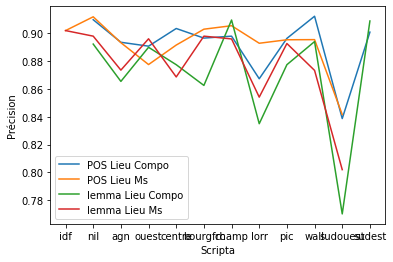

In [451]:
plt.plot(dfPlotScr)
plt.gca().legend(('POS Lieu Compo','POS Lieu Ms','lemma Lieu Compo','lemma Lieu Ms'))
plt.xlabel('Scripta')
plt.ylabel('Précision')
plt.savefig('visualisations/courbes/lemmaPosLieuxAcc.png', dpi=300, transparent=False,bbox_inches='tight') 

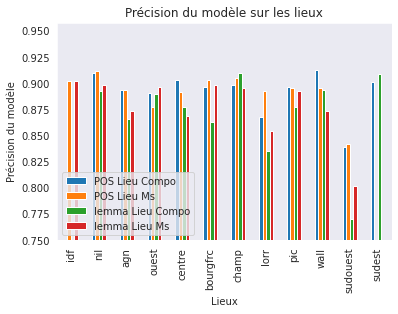

In [83]:
##version diagramme

sns.set_style("dark")
dfPlotScr.plot(kind="bar")
#dfPlotScr.sort_values('lemma', ascending=False)[['lemma','POS']].plot(kind="bar")
#permet de définir à partir d'où les données vont apparaître
plt.ylim(0.75)
plt.title("Précision du modèle sur les lieux")
plt.xlabel("Lieux")
plt.ylabel("Précision du modèle")
plt.gca().legend(('POS Lieu Compo','POS Lieu Ms','lemma Lieu Compo','lemma Lieu Ms'), loc=3)
plt.savefig('visualisationsv2/diag/lemmaPosLieux.png', dpi=300, transparent=False,bbox_inches='tight') 

In [84]:
##ploter lemma/POS pour date

dfDates = dfGlobalData[dfGlobalData["type"].isin(['dateCompositionType','dateManuscritType'])]
#df2[df2['id'].isin(['SP.POP.TOTL','NY.GNP.PCAP.CD'])]
dfDates = dfDates.loc['all']
dfDates
#sélection des colonnes pour la modélisation
dfD= dfDates[['accuracy','type','typology','label']]
dfD

,accuracy,type,typology,label
all,0.8966,dateManuscritType,1emxiie,lemma
all,0.8824,dateManuscritType,1emxve,POS
all,0.8938,dateManuscritType,mxiiie,POS
all,0.8785,dateManuscritType,2emxiiie,lemma
all,0.8777,dateManuscritType,mxiiie,lemma
all,0.913,dateManuscritType,mxive,POS
all,0.8878,dateManuscritType,1emxiiie,POS
all,0.8957,dateManuscritType,2emxiiie,POS
all,0.8586,dateManuscritType,1emxiie,POS
all,0.9349,dateManuscritType,mxiie,POS


In [85]:
dfD = pd.pivot_table(dfD, values ='accuracy', index =['typology'],columns =['label','type'], aggfunc='first')
dfD
dfPlotD = dfD[dfD.columns].astype(float) 
dfPlotD

label                    POS                                 lemma  \
type     dateCompositionType dateManuscritType dateCompositionType   
typology                                                             
1emxiie               0.8972            0.8586              0.8723   
1emxiiie              0.8997            0.8878              0.8866   
1emxive               0.8854            0.9048              0.8471   
1emxve                   NaN            0.8824                 NaN   
2emxiie               0.8889            0.9002              0.8880   
2emxiiie              0.9090            0.8957              0.8762   
2emxive               0.8909            0.9135              0.8545   
mxiie                 0.8884            0.9349              0.8741   
mxiiie                0.9070            0.8938              0.9070   
mxive                    NaN            0.9130                 NaN   
nil                   0.9239            0.9104              0.8424   

label                       
type     dateManuscritType  
typology                    
1emxiie             0.8966  
1emxiiie            0.8914  
1emxive             0.9012  
1emxve              0.8824  
2emxiie             0.8293  
2emxiiie            0.8785  
2emxive             0.8847  
mxiie               0.8465  
mxiiie              0.8777  
mxive               0.8919  
nil                 0.9104

In [86]:
#pour dates avant plot courbes
dfPlotD.index = pd.CategoricalIndex(dfPlotD.index, categories= ["nil", "1emxiie", "mxiie", "2emxiie", "1emxiiie", "mxiiie","2emxiiie","1emxive","mxive","2emxive","xve","1emxve","2emxve","mxviiie"])
dfPlotD.sort_index(level=0, inplace=True)
dfPlotOrderD = dfPlotD[::-1] 
dfPlotOrderD

label                    POS                                 lemma  \
type     dateCompositionType dateManuscritType dateCompositionType   
typology                                                             
1emxve                   NaN            0.8824                 NaN   
2emxive               0.8909            0.9135              0.8545   
mxive                    NaN            0.9130                 NaN   
1emxive               0.8854            0.9048              0.8471   
2emxiiie              0.9090            0.8957              0.8762   
mxiiie                0.9070            0.8938              0.9070   
1emxiiie              0.8997            0.8878              0.8866   
2emxiie               0.8889            0.9002              0.8880   
mxiie                 0.8884            0.9349              0.8741   
1emxiie               0.8972            0.8586              0.8723   
nil                   0.9239            0.9104              0.8424   

label                       
type     dateManuscritType  
typology                    
1emxve              0.8824  
2emxive             0.8847  
mxive               0.8919  
1emxive             0.9012  
2emxiiie            0.8785  
mxiiie              0.8777  
1emxiiie            0.8914  
2emxiie             0.8293  
mxiie               0.8465  
1emxiie             0.8966  
nil                 0.9104

/home/lucence/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:405: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



FileNotFoundError: [Errno 2] No such file or directory: 'visualisations/courbes/lemmaPosDatesAcc.png'

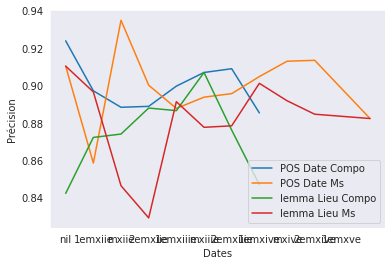

In [87]:
plt.plot(dfPlotD)
plt.gca().legend(('POS Date Compo','POS Date Ms','lemma Lieu Compo','lemma Lieu Ms'))
plt.xlabel('Dates')
plt.ylabel('Précision')
plt.savefig('visualisations/courbes/lemmaPosDatesAcc.png', dpi=300, transparent=False,bbox_inches='tight')

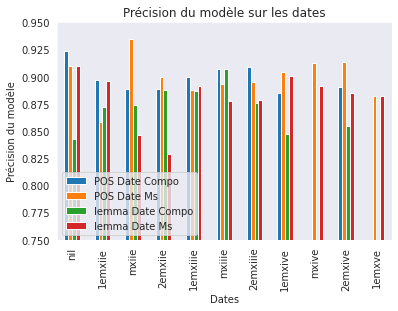

In [90]:
##version diagramme

sns.set_style("dark")
dfPlotD.plot(kind="bar")
#dfPlotScr.sort_values('lemma', ascending=False)[['lemma','POS']].plot(kind="bar")
#permet de définir à partir d'où les données vont apparaître
plt.ylim(0.75,0.95)
plt.title("Précision du modèle sur les dates")
plt.xlabel("Dates")
plt.ylabel("Précision du modèle")
plt.gca().legend(('POS Date Compo','POS Date Ms','lemma Date Compo','lemma Date Ms'), loc=3)
plt.savefig('visualisationsv2/diag/lemmaPosDates.png', dpi=300, transparent=False,bbox_inches='tight') 

In [467]:
#pour dates avant plot heatmap
dfPlot.index = pd.CategoricalIndex(dfPlot.index, categories= ["nil", "1emxiie", "mxiie", "2emxiie", "1emxiiie", "mxiiie","2emxiiie","1emxive","mxive","2emxive","xve","1emxve","2emxve","mxviiie"])
dfPlot.sort_index(level=0, inplace=True)
dfPlotOrder = dfPlot[::-1] 
dfPlotOrder

label,POS,lemma
typology,,
1emxve,0.8824,0.8824
2emxive,0.9135,0.8847
mxive,0.9130,0.8919
1emxive,0.9048,0.9012
2emxiiie,0.8957,0.8785
mxiiie,0.8938,0.8777
1emxiiie,0.8878,0.8914
2emxiie,0.9002,0.8293
mxiie,0.9349,0.8465


In [485]:
#si pas date
dfPlotOrder= dfPlot

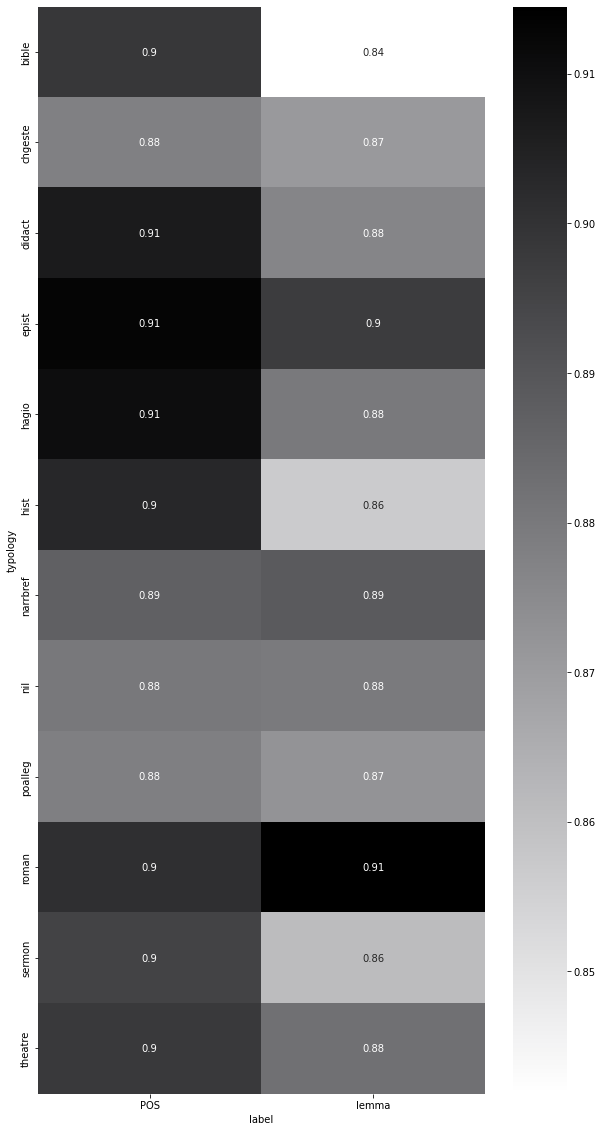

In [486]:
###ça ok
plt.figure(figsize=(10,20))
cmap = sns.cubehelix_palette(250, hue=0.05, rot=0, light=1, dark=0, as_cmap=True)
ax = sns.heatmap(dfPlotOrder, annot=True, cmap=cmap)
plt.savefig('visualisations/heatmaps/lemmaPosGenresAcc.png', dpi=300, transparent=False,bbox_inches='tight') 

In [495]:
#sélectionner les valeurs les plus faibles pour les textes
dfLow = dfPlot.nsmallest(20, 'POS')
#sélectionner les valeurs les plus hautes
dfHigh = dfPlot.nlargest(20,['POS'])

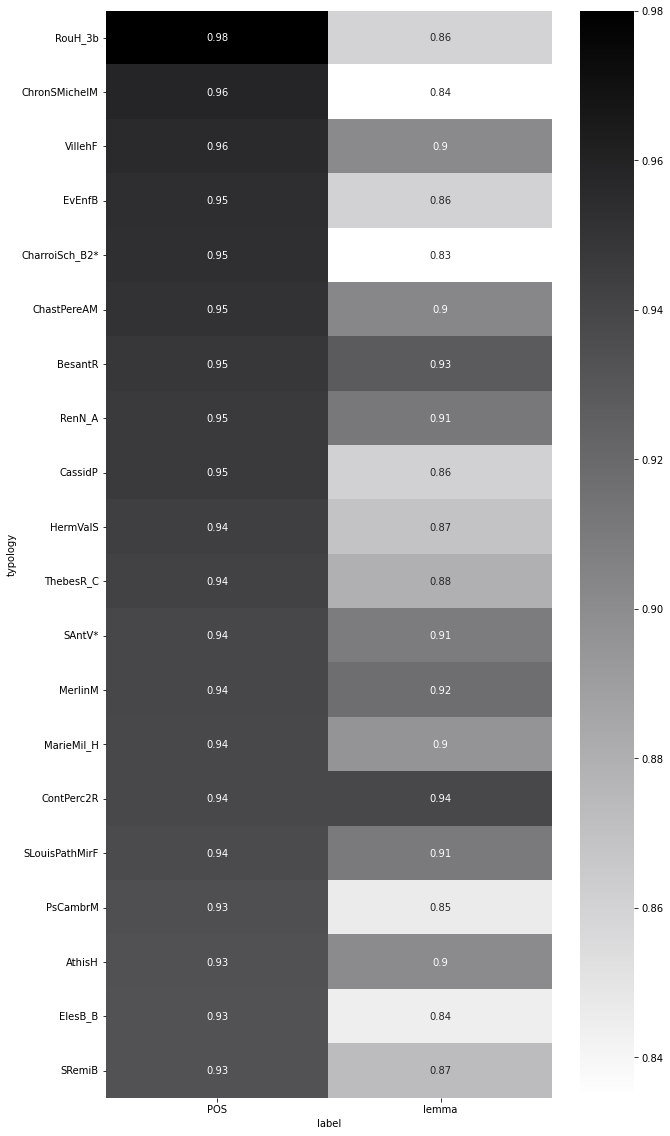

In [497]:
#on plote les valeurs les plus faibles et les plus hautes
plt.figure(figsize=(10,20))
cmap = sns.cubehelix_palette(250, hue=0.05, rot=0, light=1, dark=0, as_cmap=True)
ax = sns.heatmap(dfHigh, annot=True, cmap=cmap)
plt.savefig('visualisations/heatmaps/lemmaPosTextesHighPOS.png', dpi=300, transparent=False,bbox_inches='tight') 